In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../csv_files/cleaned_properties.csv', index_col=0)
df.head()

,locality,house_is,property_subtype,price,sale,rooms_number,area,kitchen_has,furnished,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state,region
0,4180,0.0,MIXED_USE_BUILDING,295000.0,Unknown,3.0,242.0,1.0,0.0,0.0,1.0,36.0,1.0,1000.0,1403.0,1403.0,0.0,0.0,GOOD,Wallonia
1,8730,1.0,VILLA,675000.0,Unknown,4.0,349.0,1.0,0.0,0.0,0.0,NaN,1.0,977.0,1526.0,1526.0,0.0,0.0,AS_NEW,Flanders
2,4020,0.0,APARTMENT_BLOCK,250000.0,Unknown,5.0,303.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,760.0,760.0,0.0,0.0,TO_RENOVATE,Wallonia
3,1200,1.0,HOUSE,545000.0,Unknown,4.0,235.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN,63.0,63.0,0.0,0.0,JUST_RENOVATED,Brussels
4,1190,0.0,MIXED_USE_BUILDING,500000.0,Unknown,2.0,220.0,1.0,0.0,0.0,0.0,NaN,1.0,60.0,193.0,193.0,0.0,0.0,AS_NEW,Brussels


In [6]:
df.iloc[df.area.idxmax()]

locality                        unknown
house_is                            NaN
property_subtype     Vrijstaande woning
price                               365
sale                            Unknown
rooms_number                          4
area                        1.11299e+06
kitchen_has                         NaN
furnished                             0
open_fire                             0
terrace                             NaN
terrace_area                        NaN
garden                              NaN
garden_area                         NaN
land_surface                        NaN
land_plot_surface                 36526
facades_number                      NaN
swimming_pool_has                     1
building_state                  unknown
region                          unknown
Name: 17821, dtype: object

In [7]:
df.shape

(54037, 20)

In [588]:
df.locality.unique().shape

(969,)

In [589]:
def avarage_df(df):
    by_locality = df.groupby('locality')['price'].mean()
    by_local = pd.DataFrame(by_locality)
    locality_max = by_local[by_local.price==by_local.price.max()].index[0]
    locality_min = by_local[by_local.price==by_local.price.min()].index[0]
    print('The avarage price of houses in the most expensive municipalities: ', by_local.price.max(), 'in', locality_max)
    print('The avarage price of houses in the cheapest municipalities:', by_local.price.min(), 'in', locality_min)

In [590]:
def median_df(df):
    by_locality = df.groupby('locality')['price'].median()
    by_local = pd.DataFrame(by_locality)
    locality_max = by_local[by_local.price==by_local.price.max()].index[0]
    locality_min = by_local[by_local.price==by_local.price.min()].index[0]
    print('The median price of houses in the most expensive municipalities: ', by_local.price.max(), 'in', locality_max)
    print('The median price of houses in the cheapest municipalities:', by_local.price.min(), 'in', locality_min)

In [591]:
def per_square(df):
    by_locality1 = df.groupby('locality')['price'].mean()
    by_locality2 = df.groupby('locality')['area'].mean()
    by_local1 = pd.DataFrame(by_locality1)
    by_local2 = pd.DataFrame(by_locality2)

    # Merge the DataFrames: o2o
    o2o = pd.merge(left=by_local1, right=by_local2, left_on='locality', right_on='locality')
    o2o['price_per_m2'] = o2o.price/o2o.area
    locality_max = o2o[o2o.price_per_m2==o2o.price_per_m2.max()].index[0]
    locality_min = o2o[o2o.price_per_m2==o2o.price_per_m2.min()].index[0]

    print('The avarage price of square of houses in the most expensive municipalities : ', o2o.price_per_m2.max(), 'in', locality_max)
    print('The avarage price of square of houses in the cheapest municipalities:', o2o.price_per_m2.min(), 'in', locality_min)    

## The most expensive and the cheapest price of 3-room and good-condition house by location in Belgium

In [840]:
house_filtered = df.loc[(df.rooms_number==3) & (df.house_is==True)]
house_filtered.shape

(9703, 20)

In [841]:
by_locality = house_filtered.groupby('locality')['price'].mean()
by_local = pd.DataFrame(by_locality)
result_most = by_local[by_local.price>800000]
result_less = by_local[by_local.price<120000]

In [842]:
result_most.price.max()

1275000.0

In [843]:
result_less.price.min()

75000.0

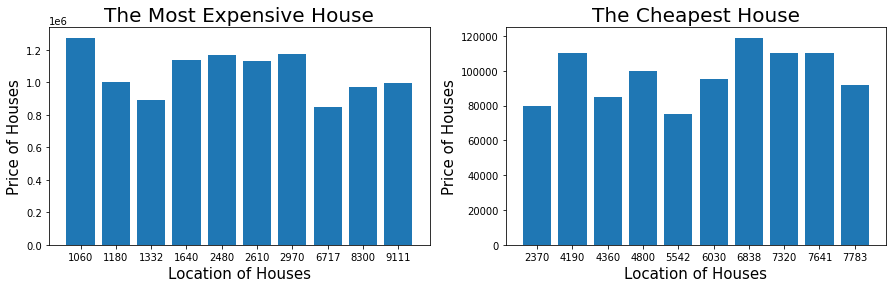

In [838]:
plt.figure(figsize=(15,4))

# Create plot axes for the first line plot
plt.subplot(1, 2, 1) 

plt.bar(result_most.index, result_most.price)
plt.xlabel('Location of Houses', fontsize=15)
plt.ylabel('Price of Houses', fontsize=15)
plt.title('The Most Expensive House', fontsize=20)

# Create plot axes for the second line plot
plt.subplot(1, 2, 2) 

plt.bar(result_less.index, result_less.price)
plt.xlabel('Location of Houses', fontsize=15)
plt.ylabel('Price of Houses', fontsize=15)
plt.title('The Cheapest House', fontsize=20)

plt.savefig("pictures/The most expensive and the cheapest price of 3-room house by location in Belgium.png")

# Display the plot
plt.show()

### In avarage price

In [596]:
avarage_df(house_filtered)

The avarage price of houses in the most expensive municipalities:  2400000.0 in 1060
The avarage price of houses in the cheapest municipalities: 70000.0 in 7320


### In median price

In [597]:
median_df(house_filtered)

The median price of houses in the most expensive municipalities:  2400000.0 in 1060
The median price of houses in the cheapest municipalities: 70000.0 in 7320


### Per square meter

In [598]:
per_square(house_filtered)

The avarage price of square of houses in the most expensive municipalities :  5882.35294117647 in 7850
The avarage price of square of houses in the cheapest municipalities: 623.3333333333334 in 8780


## The most expensive and the cheapest price of 3-room and good-condition house by location in Wallonia

In [599]:
house_filtered = df.loc[(df.rooms_number==3) & (df.house_is==True) & (df.building_state=='GOOD') & (df.region=='Wallonia')]
house_filtered.shape

(589, 20)

In [600]:
by_locality = house_filtered.groupby('locality')['price'].mean()
by_local = pd.DataFrame(by_locality)
result_most = by_local[by_local.price>450000]
result_less = by_local[by_local.price<120000]

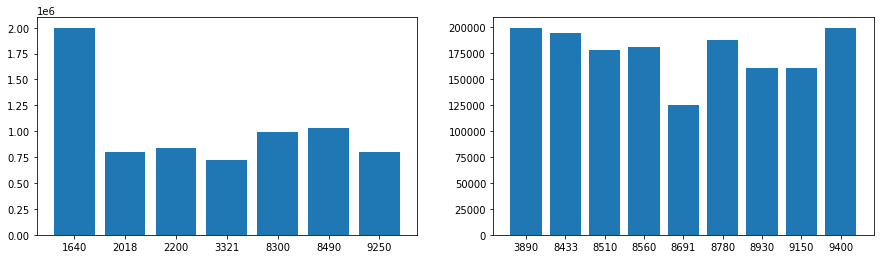

In [630]:
plt.figure(figsize=(15,4))

# Create plot axes for the first line plot
plt.subplot(1, 2, 1) 

plt.bar(result_most.index, result_most.price)

# Create plot axes for the second line plot
plt.subplot(1, 2, 2) 

plt.bar(result_less.index, result_less.price)

# Display the plot
plt.show()

### In avarage price

In [603]:
avarage_df(house_filtered)

The avarage price of houses in the most expensive municipalities:  1014500.0 in 1332
The avarage price of houses in the cheapest municipalities: 70000.0 in 7320


### In median price

In [604]:
median_df(house_filtered)

The median price of houses in the most expensive municipalities:  1014500.0 in 1332
The median price of houses in the cheapest municipalities: 70000.0 in 7320


### Per square meter

In [605]:
per_square(house_filtered)

The avarage price of square of houses in the most expensive municipalities :  5882.35294117647 in 7850
The avarage price of square of houses in the cheapest municipalities: 694.4444444444445 in 6830


## The most expensive and the cheapest price of 3-room and good-condition house by location in Flanders

In [606]:
house_filtered = df.loc[(df.rooms_number==3) & (df.house_is==True) & (df.building_state=='GOOD') & (df.region=='Flanders')]
house_filtered.shape

(739, 20)

In [607]:
by_locality = house_filtered.groupby('locality')['price'].mean()
by_local = pd.DataFrame(by_locality)
result_most = by_local[by_local.price>700000]
result_less = by_local[by_local.price<200000]

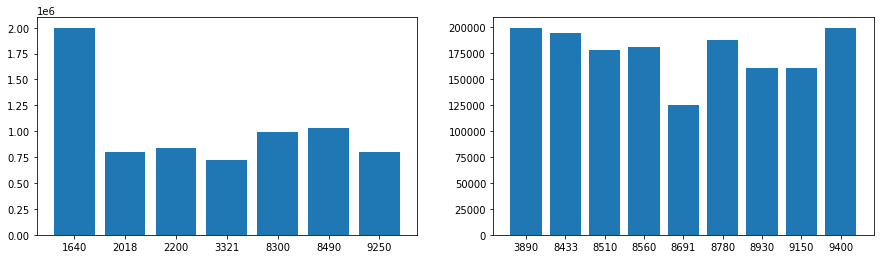

In [631]:
plt.figure(figsize=(15,4))

# Create plot axes for the first line plot
plt.subplot(1, 2, 1) 

plt.bar(result.index, result_most.price)

# Create plot axes for the second line plot
plt.subplot(1, 2, 2) 

plt.bar(result_less.index, result_less.price)

# Display the plot
plt.show()

### In avarage price

In [610]:
avarage_df(house_filtered)

The avarage price of houses in the most expensive municipalities:  2000000.0 in 1640
The avarage price of houses in the cheapest municipalities: 125000.0 in 8691


### In median price

In [611]:
median_df(house_filtered)

The median price of houses in the most expensive municipalities:  2000000.0 in 1640
The median price of houses in the cheapest municipalities: 125000.0 in 8691


### Per square meter

In [612]:
per_square(house_filtered)

The avarage price of square of houses in the most expensive municipalities :  4944.444444444444 in 2600
The avarage price of square of houses in the cheapest municipalities: 623.3333333333334 in 8780


## Building State

In [758]:
house_filtered = df.loc[(df.rooms_number==3) & (df.house_is==True) & (df.region=='Brussels')]
by_state = house_filtered.groupby('building_state')['price'].mean()
by_st_house = pd.DataFrame(by_state)
by_st_house.drop(by_st_house[by_st_house.index == 'unknown'].index, inplace = True)
by_st_house = by_st_house.reset_index()

apt_filtered = df.loc[(df.rooms_number==3) & (df.house_is==False) & (df.region=='Brussels')]
by_state = apt_filtered.groupby('building_state')['price'].mean()
by_st_apt = pd.DataFrame(by_state)
by_st_apt.drop(by_st_apt[by_st_apt.index == 'unknown'].index, inplace = True)
by_st_apt = by_st_apt.reset_index()

In [759]:
by_st_house.building_state = ['AS_NEW', 'GOOD', 'JUST RENOVATED', 'TO_BE DONE_UP', 'TO RENOVATE']
by_st_apt.building_state = ['AS_NEW', 'GOOD', 'JUST RENOVATED', 'TO_BE DONE_UP', 'TO RENOVATE', 'TO RESTORE']

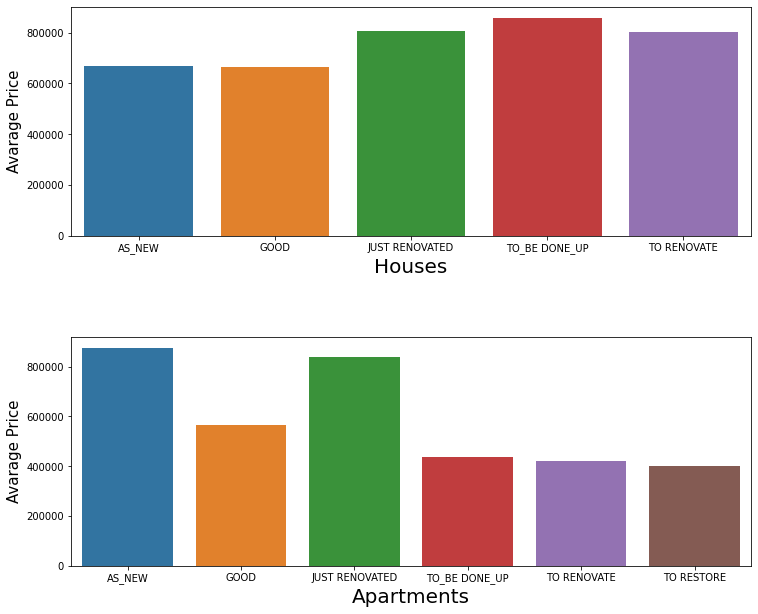

In [761]:
plt.figure(figsize=(12,10))

# Create plot axes for the first line plot
plt.subplot(2, 1, 1) 

ax1 = sns.barplot(x='building_state', y='price', data=by_st_house)
plt.xlabel('Houses', fontsize=20)
plt.ylabel('Avarage Price', fontsize=15)
#plt.title('The Avarage Price of Houses by Location', fontsize=20)


# Create plot axes for the second line plot
plt.subplot(2, 1, 2) 

ax2 = sns.barplot(x='building_state', y='price', data=by_st_apt)
plt.xlabel('Apartments', fontsize=20)
plt.ylabel('Avarage Price', fontsize=15)
#plt.title('The Avarage Price of Apartments by Location ', fontsize=20)
plt.tight_layout(pad=6)
# Display the plot

plt.savefig("pictures/building_states-in-Belgium.png")
plt.show()

In [686]:
house_filtered = df.loc[(df.house_is == True) & (df.area.between(80, 300)) & (df.price.between(0, 600000)) & (df.house_is == True)]

/home/becode/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


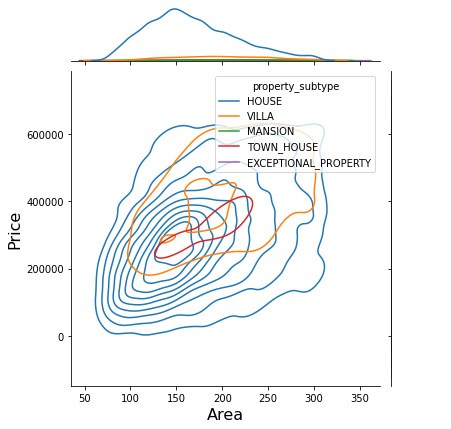

In [693]:
g = sns.jointplot(x='area', y='price', data=house_filtered, hue='property_subtype', kind='kde')
g.set_axis_labels('Area', 'Price', fontsize=16)


plt.xlim(0, 1)
plt.show() 

In [695]:
house_brussels_filtered = df.loc[(df.house_is == True) & (df.region == "Brussels") & (df.area.between(50, 500)) & (df.price.between(0, 2000000))]
house_wallonia_filtered = df.loc[(df.house_is == True) & (df.region == "Wallonia") & (df.area.between(50, 500)) & (df.price.between(0, 2000000))]
house_flanders_filtered = df.loc[(df.house_is == True) & (df.region == "Flanders") & (df.area.between(50, 500)) & (df.price.between(0, 2000000))]

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


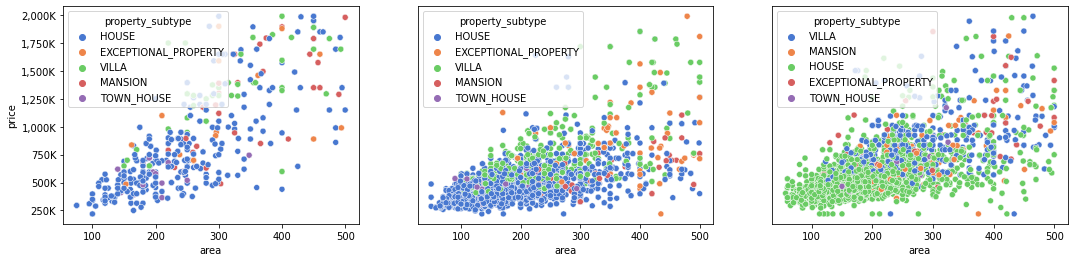

In [704]:
plt.figure(figsize=(18, 4))

plt.subplot(1,3,1)

ax_brussels= sns.scatterplot(x='area', y='price', data = house_brussels_filtered, hue="property_subtype", palette="muted")
plt.subplot(1,3,2)
ax_wallonia = sns.scatterplot(x='area', y='price', data = house_wallonia_filtered, hue="property_subtype", palette="muted")
plt.subplot(1,3,3)
ax_flanders = sns.scatterplot(x='area', y='price', data = house_flanders_filtered, hue="property_subtype", palette="muted")

pricelabels = ['{:,.0f}'.format(x) + 'K' for x in ax_brussels.get_yticks()/1000]

ax_brussels.set_yticklabels(pricelabels)
ax_wallonia.set_yticklabels(pricelabels)
ax_wallonia.axes.yaxis.set_visible(False)
ax_flanders.set_yticklabels(pricelabels)
ax_flanders.axes.yaxis.set_visible(False)


plt.show()

In [784]:
df.building_state.value_counts()

unknown           25177
AS_NEW            12412
GOOD               9559
TO_BE_DONE_UP      2515
TO_RENOVATE        2184
JUST_RENOVATED     2047
TO_RESTORE          143
Name: building_state, dtype: int64

## The most expensive and the cheapest price of 2-room apartments by location in Belgium

In [8]:
apt_filtered = df.loc[(df.rooms_number==2) & (df.house_is==False) &(df.price.between(0, 600000))]
apt_filtered.shape

(8472, 20)

In [9]:
by_locality = apt_filtered.groupby('locality')['price'].mean()
by_local = pd.DataFrame(by_locality)
result_most = by_local[by_local.price>430000]
result_less = by_local[by_local.price<100000]

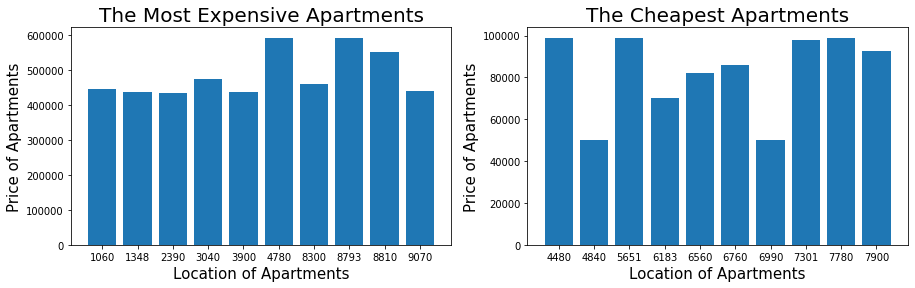

In [10]:
plt.figure(figsize=(15,4))

# Create plot axes for the first line plot
plt.subplot(1, 2, 1) 

plt.bar(result_most.index, result_most.price)
plt.xlabel('Location of Apartments', fontsize=15)
plt.ylabel('Price of Apartments', fontsize=15)
plt.title('The Most Expensive Apartments', fontsize=20)

# Create plot axes for the second line plot
plt.subplot(1, 2, 2) 

plt.bar(result_less.index, result_less.price)
plt.xlabel('Location of Apartments', fontsize=15)
plt.ylabel('Price of Apartments', fontsize=15)
plt.title('The Cheapest Apartments', fontsize=20)

plt.savefig("pictures/The most expensive and the cheapest price of 2-room Apartments by location in Belgium.png")

# Display the plot
plt.show()

In [15]:
print(result_most.price.idxmax())
result_most.price.max()

8793


592000.0

In [17]:
print(result_less.price.idxmax())
result_less.price.min()

4480


50000.0